# **DATA EXPLORATION**

The dataset records the results of direct marketing campaigns (via telephone) carried out by a Portuguese banking institution.

The dataset is available in several versions (full, sampled, and additional) and contains approximately 41,000 to 45,000 records with 17 to 21 attributes, including demographic information, details of the last contact, and data from previous marketing campaigns.


* **Dataset Name**: Bank Marketing
* **Author**: Paulo Cortez and Sérgio Moro
* **Published**: Circa 2012
* **Number** **of** **Records**: 45,211 rows (full version) / 41,188 rows (additional version)
* **Number** **of** **Features**: 17–20 columns (depending on version)
Source: UCI Machine Learning Repository – Bank Marketing Dataset
* **Source**: UCI Machine Learning Repository – [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing)
* **General** **Description**:
This dataset contains results from telephone marketing campaigns by a Portuguese bank, aiming to predict whether a client will subscribe to a term deposit. It includes demographic, financial, contact, and campaign-related features collected between May 2008 and November 2010.

## Data Understanding

Feature Description Table

| No | Feature Name | Type | Description / Categories |
|---|---|---|---|
| 1 | `age` | Numeric | Client's age. |
| 2 | `job` | Categorical | Type of job: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown". |
| 3 | `marital` | Categorical | Marital status: "divorced", "married", "single", "unknown". *(Note: divorced includes divorced and widowed)* |
| 4 | `education` | Categorical | Education level: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown". |
| 5 | `default` | Binary | Has credit in default? "yes", "no", "unknown". |
| 6 | `balance` | Numeric | Average yearly balance. |
| 7 | `housing` | Binary | Has housing loan? "yes", "no", "unknown". |
| 8 | `loan` | Binary | Has personal loan? "yes", "no", "unknown". |
| 9 | `contact` | Categorical | Contact communication type: "cellular", "telephone". |
| 10 | `day_of_week` | Categorical | Last contact day of the week: "mon", "tue", "wed", "thu", "fri". |
| 11 | `month` | Categorical | Last contact month of year: "jan", "feb", "mar", ..., "nov", "dec". |
| 12 | `duration` | Numeric | Last contact duration, in seconds. **(Note:** Should be discarded for realistic predictive models since it's only known after the call). |
| 13 | `campaign` | Numeric | Number of contacts performed during this campaign and for this client (includes last contact). |
| 14 | `pdays` | Numeric | Number of days that passed since the client was last contacted from a previous campaign (-1 means client not previously contacted). |
| 15 | `previous` | Numeric | Number of contacts performed before this campaign for this client. |
| 16 | `poutcome` | Categorical | Outcome of the previous marketing campaign: "failure", "nonexistent", "success". |
| 17 | `y` | Binary | Has the client subscribed to a term deposit? "yes", "no". |

## Loading Data

In [ ]:
!pip install numpy pandas matplotlib seaborn scipy scikit-learn imbalanced-learn xgboost catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
# IMPORT LIBRARIES
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import chi2_contingency, mannwhitneyu, uniform, randint

from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import Pool, CatBoostClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE



In [ ]:
# LOADING DATA
SHEET_ID = "1MPp-ooRqDQ3waHwB7C4X23Jf9Ks1hpXkEN2bKZ9rLN4"
GID = "501740460"

url_csv = f"https://docs.google.com/spreadsheets/d/{SHEET_ID}/export?format=csv&gid={GID}"

df = pd.read_csv(url_csv)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# UNIQUE VALUES IN EVERY COLUMN
for i in df.columns:
    print(i,'\n')

    print(set(df[i].tolist()),'\n')

age 

{18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95} 

job 

{'unemployed', 'services', 'admin.', 'student', 'entrepreneur', 'technician', 'blue-collar', 'housemaid', 'self-employed', 'retired', 'management', 'unknown'} 

marital 

{'married', 'divorced', 'single'} 

education 

{'secondary', 'primary', 'tertiary', 'unknown'} 

default 

{'yes', 'no'} 

balance 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 9

## Data Cleaning

In [ ]:
# HANDLING DUPLICATED DATA
df.drop_duplicates(inplace=True)
display(df.duplicated().sum())

np.int64(0)

In [ ]:
# BINARY ENCODING TARGET VALUES
df['y'] = df['y'].replace({'yes': 1, 'no': 0})
df['y'] = df['y'].astype(int)

In [ ]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# Mengubah semua kolom bertipe object menjadi category
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# Mengecek hasil perubahan tipe data
print(df.dtypes)

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y               int64
dtype: object


In [ ]:
# IDENTIFYING CATECORICAL COLUMNS
categorical_cols = df.select_dtypes(include=['object', 'category'])
categorical_columns = categorical_cols.columns.tolist()

print("Categorical columns:")
print(categorical_columns)

Categorical columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [ ]:
# IDENTIFYING NUMERICAL COLUMNS
numerical_cols = df.select_dtypes(include=['int', 'float'])
numerical_columns = numerical_cols.columns.tolist()
print("Numerical columns:")
print(numerical_columns)

Numerical columns:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


## EDA

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


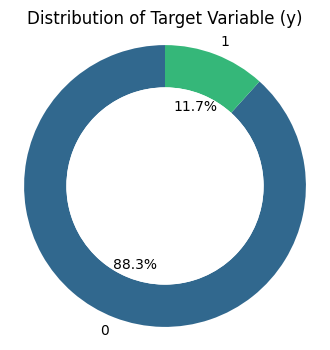

In [ ]:
# DISTRIBUTIO OF TARGET VARIABLE 'y'
y_counts = df['y'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(y_counts)), wedgeprops=dict(width=0.3))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Target Variable (y)')
plt.axis('equal')
plt.show()

This indicates a highly imbalanced dataset, with a much larger proportion of non-subscribers compared to subscribers.

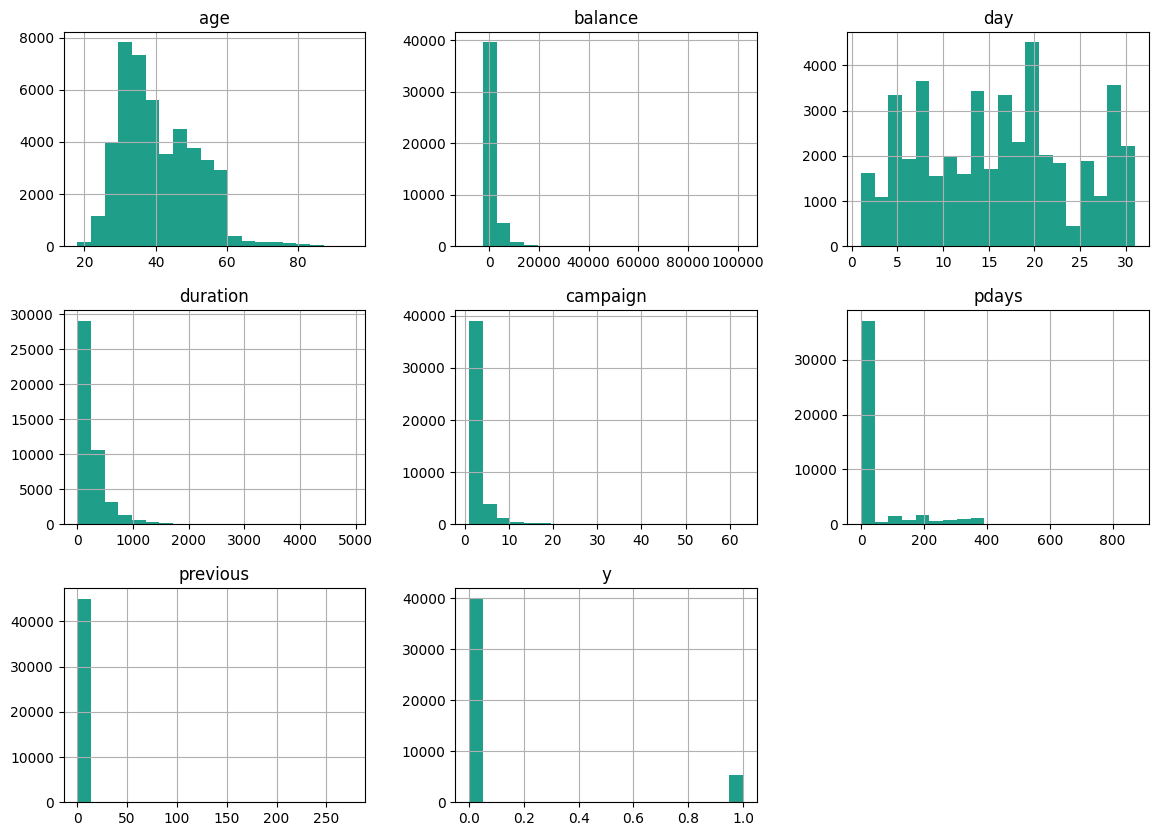

In [ ]:
# HISTOGRAM
df.hist(bins=20, figsize=(14,10), color='#1F9E89')
plt.show()

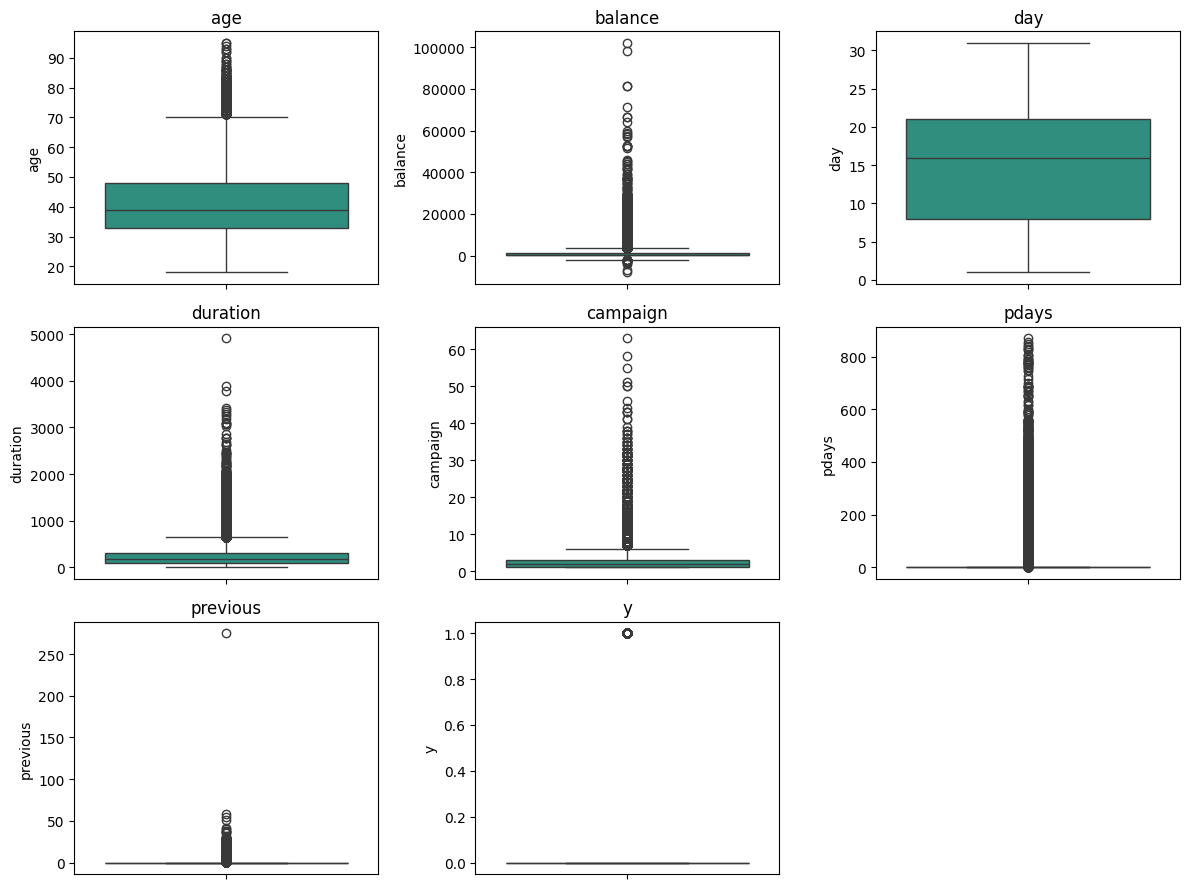

In [ ]:
# BOXPLOT
cols = 3
num_cols = df.select_dtypes(include=['number']).columns
rows = math.ceil(len(num_cols) / cols)

plt.figure(figsize=(4*cols, 3*rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col], color='#1F9E89')
    plt.title(col)
plt.tight_layout()
plt.show()

dari heatmap dan boxplot diatas, dapat disimpulkan:

* **Age:** Sebagian besar nasabah berusia 25–50 tahun, dengan sedikit yang lebih tua dari 60 tahun.
* **Balance:** Mayoritas memiliki saldo rendah, tapi ada beberapa dengan saldo sangat tinggi.
* **Day:** Kontak dilakukan merata di semua hari dalam sebulan.
* **Duration:** Sebagian besar panggilan singkat, namun ada beberapa yang berlangsung sangat lama.
* **Campaign:** Umumnya nasabah dihubungi 1–3 kali, hanya sedikit yang lebih dari 10 kali.
* **Pdays:** Kebanyakan belum pernah dihubungi sebelumnya, tapi ada sedikit yang dihubungi kembali setelah waktu lama.
* **Previous:** Hampir semua belum pernah dihubungi sebelumnya, hanya sedikit yang memiliki riwayat kontak berulang.


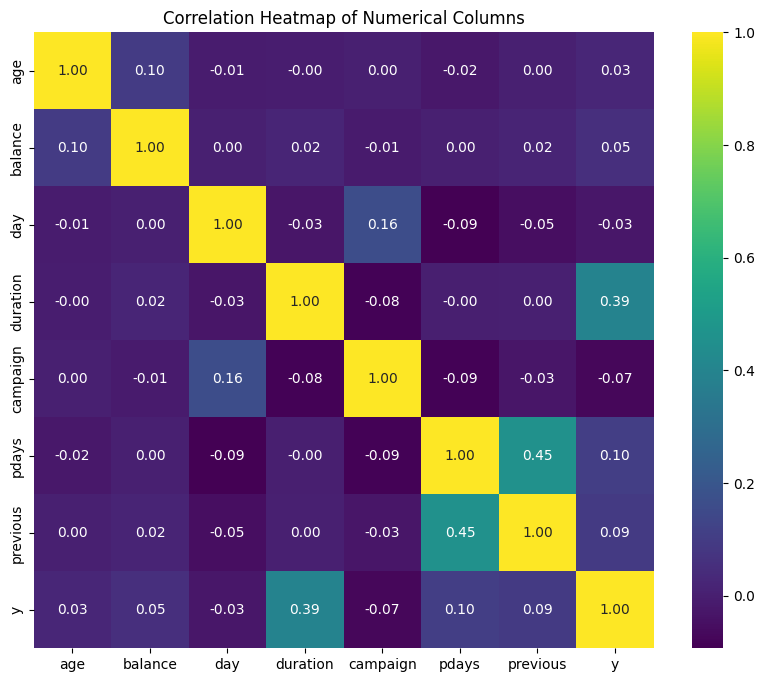

In [ ]:
# HEATMAP
numerical_correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

* Sebagian besar fitur memiliki korelasi rendah.
* Korelasi tertinggi terdapat pada **pdays** dan **previous**.
* **Duration** paling berpengaruh terhadap **y**.
* Tidak ada multikolinearitas, cocok untuk regresi logistik.


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
# Exclude the target variable 'y' if it's still in the list (it should be int now, but double-check)
if 'y' in categorical_columns:
    categorical_columns.remove('y')


cols = 3
rows = math.ceil(len(categorical_columns) / cols)

plt.figure(figsize=(6*cols, 4*rows))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(rows, cols, i)
    ct = pd.crosstab(df[col], df['y'])
    ct.plot(kind='bar', stacked=True, figsize=(10, 14), ax=plt.gca(), colormap='viridis')
    plt.title(f'Distribution of {col} vs. Target (y)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Subscribed (y)', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

<Figure size 1800x0 with 0 Axes>

In [ ]:
if 'y' in categorical_columns:
    categorical_columns.remove('y')

for col in categorical_columns:
    print(f"Cross-tabulation for: {col}")
    ct = pd.crosstab(df[col], df['y'])
    ct['Churn Percentage (%)'] = (ct[1] / (ct[0] + ct[1])) * 100
    display(ct)


Nasabah yang **tidak churn (berlangganan / “Yes”)** cenderung memiliki karakteristik berikut:

* **Pernah sukses** pada kampanye sebelumnya (*poutcome = success*),
* Dihubungi lewat **cellular**,
* Dihubungi pada **bulan Mei–Agustus**,
* Memiliki pekerjaan seperti **retired, management, atau student**,
* **Berpendidikan tinggi (tertiary)**,
* **Tidak memiliki pinjaman** (loan/housing = no), dan
* Umumnya **tidak memiliki kredit macet (default = no)**.

Variabel paling berpengaruh terhadap *not churn* adalah **poutcome, contact, dan month**.




---



**Binning pada variabel age dan balance** dilakukan untuk menyederhanakan data dengan mengelompokkan nilai ke dalam kategori agar lebih mudah dianalisis dan diinterpretasikan. Pada **age**, binning membagi umur menjadi kelompok seperti muda, dewasa, dan lansia. Pada **balance**, binning mengelompokkan saldo berdasarkan tingkat ekonomi di Portugal (sangat rendah hingga sangat tinggi). Langkah ini membantu mengurangi noise dan menangkap pola hubungan non-linear dengan variabel target.


In [ ]:
# AGE BINNING
age_bins = [14, 24, 34, 49, 64, df['age'].max()+1]
age_labels = ['Young Adult', 'Early Working Adult', 'Middle-aged Adult', 'Mature Adult', 'Senior / Elderly']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

display(df['age_group'].value_counts())

,count
age_group,
Middle-aged Adult,20940
Early Working Adult,12576
Mature Adult,10304
Senior / Elderly,884
Young Adult,507


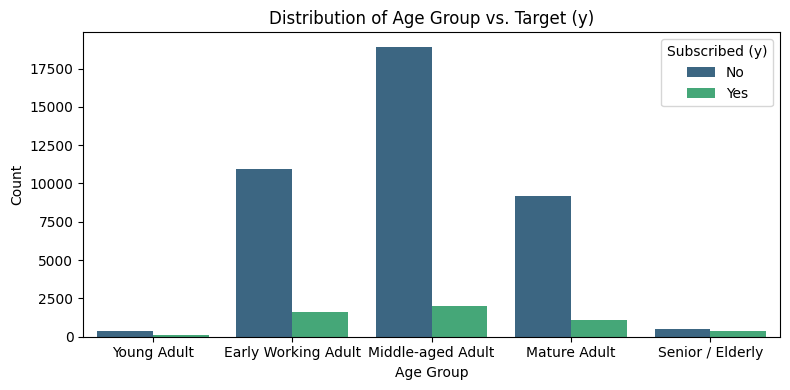

In [ ]:
# DISTRIBUTION OF AGE GROUP AGAINST TARGET VARIABLE 'y'
plt.figure(figsize=(8, 4))
sns.countplot(x='age_group', hue='y', data=df, palette='viridis')
plt.title('Distribution of Age Group vs. Target (y)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Subscribed (y)', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Visualisasi menunjukkan bahwa kelompok usia menengah (*Middle-aged Adult*) paling banyak dan memiliki tingkat berlangganan tertinggi, sedangkan kelompok usia muda dan lanjut memiliki jumlah paling sedikit.


In [ ]:
display(df['job'].value_counts())

,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


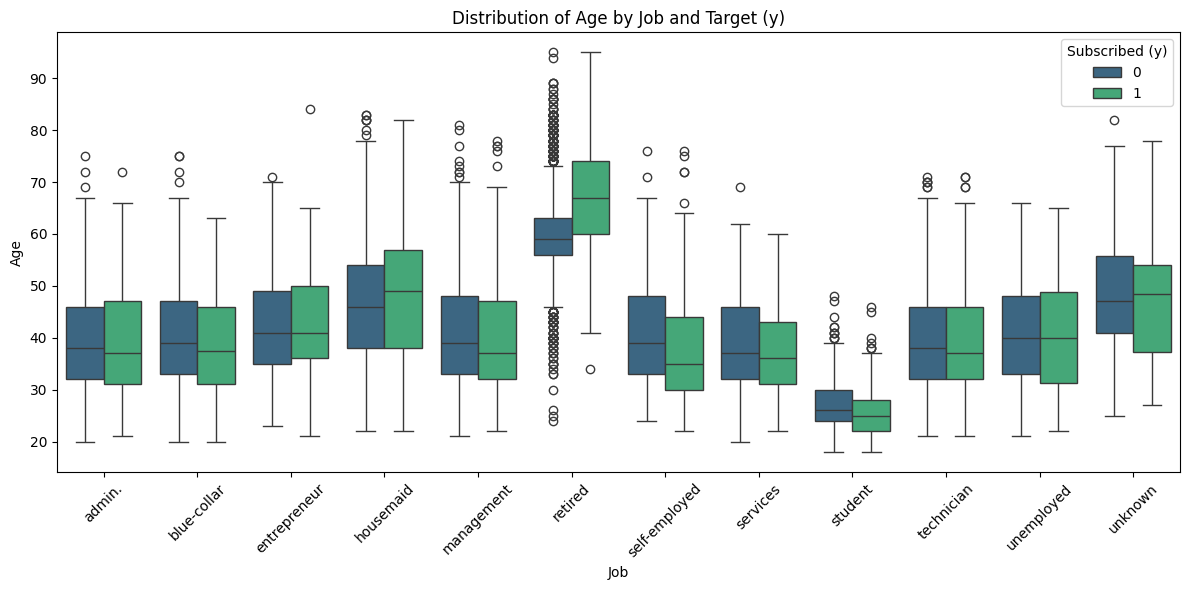

In [ ]:
# VISUALIZATION OF AGE AND JOB AGAINST TARGET VARIABLE 'y'
plt.figure(figsize=(12, 6))
sns.boxplot(x='job', y='age', hue='y', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Age by Job and Target (y)')
plt.xlabel('Job')
plt.ylabel('Age')
plt.legend(title='Subscribed (y)')
plt.tight_layout()
plt.show()

Grafik menunjukkan bahwa nasabah dengan pekerjaan *retired* memiliki usia tertinggi dan tingkat berlangganan paling tinggi, sedangkan *student* memiliki usia termuda namun juga menunjukkan kecenderungan berlangganan yang cukup besar. Pekerjaan lain seperti *management*, *technician*, dan *blue-collar* memiliki sebaran usia lebih merata dengan tingkat berlangganan yang relatif lebih rendah.


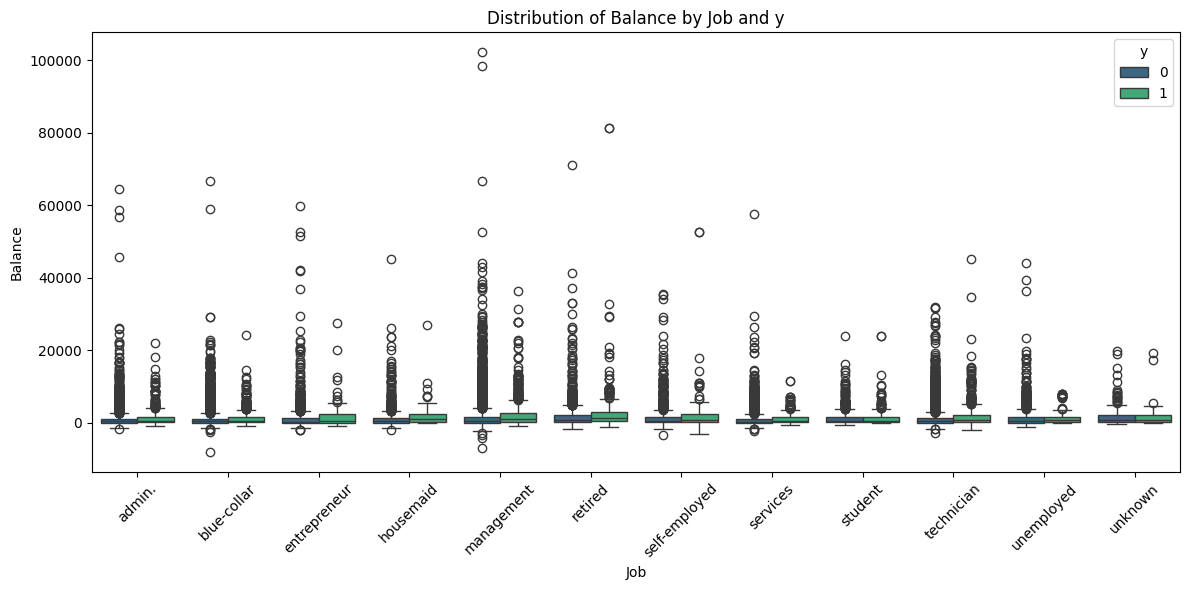

In [ ]:
# DISTRIBUTION OF BALANCE BY JOB AND 'y'
plt.figure(figsize=(12,6))
sns.boxplot(x='job', y='balance', hue='y', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Balance by Job and y')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.legend(title='y')
plt.tight_layout()
plt.show()

Dari grafik terlihat bahwa nasabah yang berlangganan (y=1) umumnya memiliki saldo (balance) sedikit lebih tinggi dibandingkan yang tidak berlangganan (y=0) di hampir semua kategori pekerjaan, meskipun terdapat banyak outlier dan variasi besar di setiap kelompok. Ini menunjukkan adanya indikasi bahwa tingkat saldo dapat berpengaruh terhadap keputusan berlangganan, namun perbedaan tersebut perlu diuji lebih lanjut dengan uji statistik seperti t-test atau Mann–Whitney U test untuk memastikan signifikansinya.



---



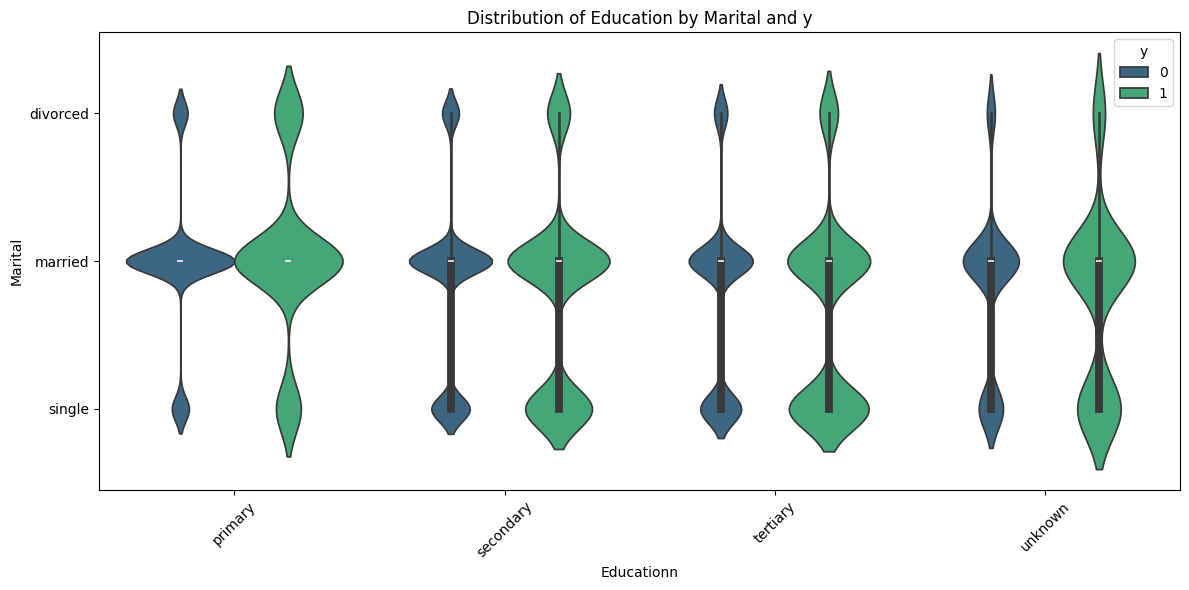

In [ ]:
# DISTRIBUTION OF EDUCATION BY MARITAL AND 'y'
plt.figure(figsize=(12,6))
sns.violinplot(x='education', y='marital', hue='y', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Education by Marital and y')
plt.xlabel('Educationn')
plt.ylabel('Marital')
plt.legend(title='y')
plt.tight_layout()
plt.show()

Grafik menunjukkan bahwa nasabah dengan tingkat pendidikan tertiary dan secondary cenderung lebih banyak berlangganan (y=1), terutama pada kelompok single. Sebaliknya, nasabah dengan pendidikan primary dan status married atau divorced memiliki proporsi berlangganan yang lebih rendah. Pola ini mengindikasikan bahwa tingkat pendidikan dan status pernikahan dapat berpengaruh terhadap keputusan berlangganan produk bank.

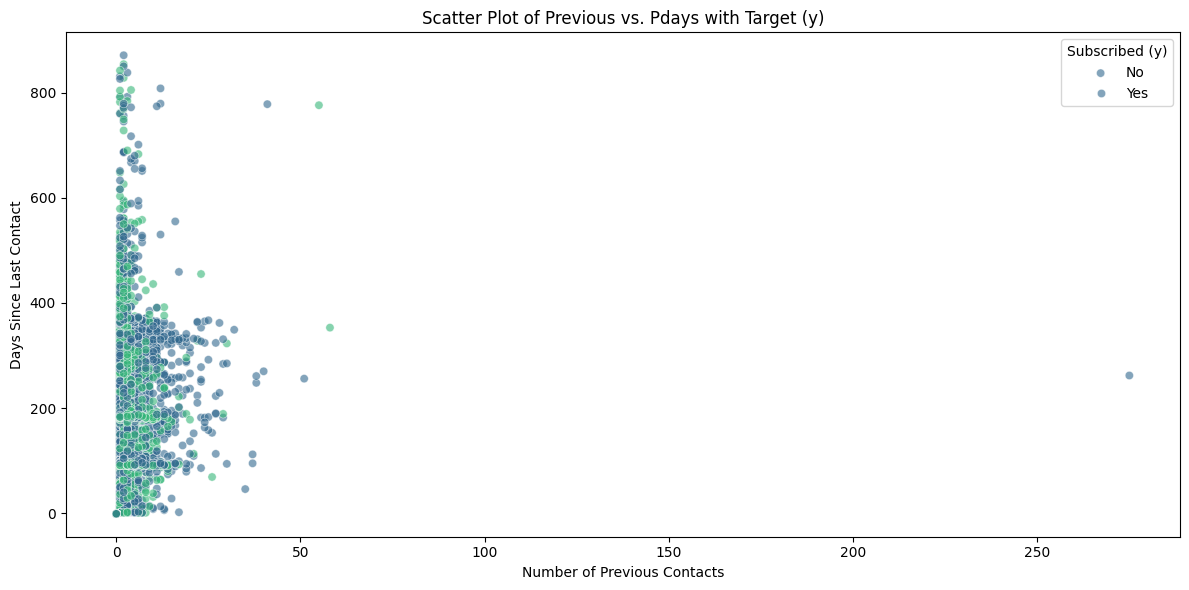

In [ ]:
# SCATTER PLOT OF PREVIOUS AND PDAYS AGAINST TARGET VARIABLE 'y'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='previous', y='pdays', hue='y', data=df, palette='viridis', alpha=0.6)
plt.title('Scatter Plot of Previous vs. Pdays with Target (y)')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Days Since Last Contact')
plt.legend(title='Subscribed (y)', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

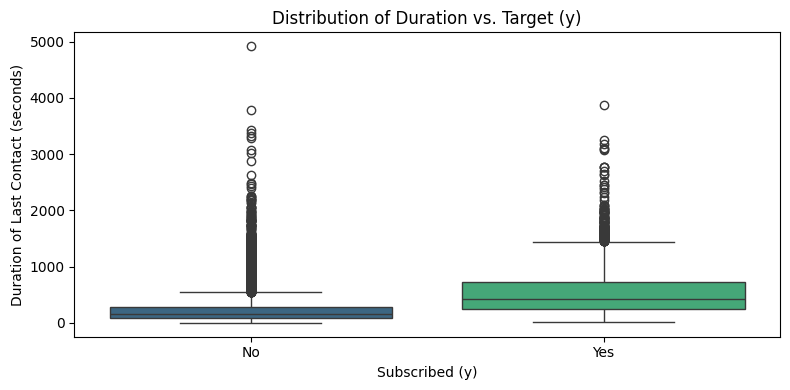

In [ ]:
# VISUALIZATION OF DURATION AGAINST TARGET VARIABLE 'y'
plt.figure(figsize=(8, 4))
sns.boxplot(x='y', y='duration', data=df, palette='viridis')
plt.title('Distribution of Duration vs. Target (y)')
plt.xlabel('Subscribed (y)')
plt.ylabel('Duration of Last Contact (seconds)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

## Statistical Test

In [ ]:
# MANN-WHITNEY U TEST FOR NUMERICAL COLUMNS AGAINST TARGET VARIABLE 'y'
numerical_cols_without_y = [col for col in numerical_columns if col != 'y']

results = []
for col in numerical_cols_without_y:
    subscribed = df[df['y'] == 1][col]
    not_subscribed = df[df['y'] == 0][col]
    statistic, p_value = mannwhitneyu(subscribed, not_subscribed)

    alpha = 0.05
    significance = "Significant" if p_value < alpha else "Not Significant"

    results.append({
        'Column': col,
        'Mann-Whitney U Statistic': statistic,
        'P-value': p_value,
        'Significance': significance
    })

results_df = pd.DataFrame(results)
display(results_df)

,Column,Mann-Whitney U Statistic,P-value,Significance
0,age,103915109.5,6.281791e-02,Not Significant
1,balance,124589983.5,6.593846e-101,Significant
2,day,99974112.0,3.326079e-10,Significant
3,duration,170521757.0,0.000000e+00,Significant
4,campaign,90300543.5,1.948490e-71,Significant
5,pdays,125257746.5,2.484118e-235,Significant
6,previous,127174833.0,3.491824e-283,Significant


In [ ]:
# CHI-SQUARED TEST FOR CATEGORICAL COLUMNS AGAINST TARGET VARIABLE 'y'
categorical_columns_without_y = [col for col in categorical_columns if col != 'y']

results_chi2 = []
for col in categorical_columns_without_y:
    contingency_table = pd.crosstab(df[col], df['y'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    alpha = 0.05
    significance = "Significant" if p < alpha else "Not Significant"

    results_chi2.append({
        'Column': col,
        'Chi-squared Statistic': chi2,
        'P-value': p,
        'Degrees of Freedom': dof,
        'Significance': significance
    })

results_chi2_df = pd.DataFrame(results_chi2)
display(results_chi2_df)

""


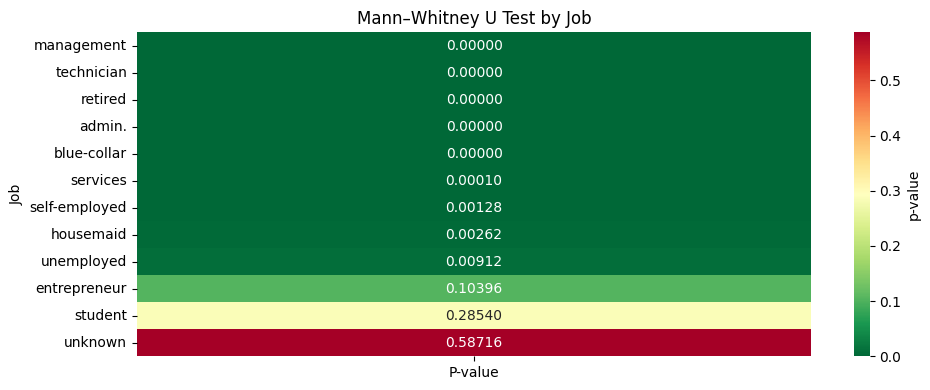

In [ ]:
# STATISTIC TEST ON JOB AND BALANCE BY Y
result = []
for j, s in df.groupby('job'):
    y1, y0 = s[s['y']==1]['balance'], s[s['y']==0]['balance']
    p = mannwhitneyu(y1, y0).pvalue if len(y1) and len(y0) else None
    result.append([j, p])

df_result = pd.DataFrame(result, columns=['Job', 'P-value']).sort_values('P-value')

plt.figure(figsize=(10,4))
sns.heatmap(df_result.set_index('Job')[['P-value']], annot=True, cmap='RdYlGn_r', fmt=".5f", cbar_kws={'label':'p-value'})
plt.title("Mann–Whitney U Test by Job")
plt.tight_layout()
plt.show()

Hasil uji **Mann–Whitney U** menunjukkan bahwa sebagian besar pekerjaan memiliki perbedaan saldo signifikan antara nasabah yang berlangganan dan tidak, terutama pada *management*, *technician*, *blue-collar*, dan *retired*. Temuan ini konsisten dengan **boxplot sebelumnya**, di mana perbedaan distribusi saldo terlihat jelas pada kelompok tersebut, sedangkan kategori seperti *entrepreneur*, *student*, dan *unknown* tidak menunjukkan perbedaan berarti.


# **DATA PREPROCESSING**

## Handling outliers and Missing Value

In [ ]:
df.drop( columns = ['duration'], inplace=True)

In [ ]:
missing_values_percentage = df.isnull().mean() * 100
print("Percentage of missing values per column:")
display(missing_values_percentage)

Percentage of missing values per column:


,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
balance,0.0
housing,0.0
loan,0.0
contact,0.0
day,0.0


## Feature Engineering

In [ ]:
# Rasio call-to-response
df['contacts_per_prev'] = df['campaign'] / (df['previous'] + 1)

# Indikator nasabah pernah dihubungi sebelumnya
df['was_contacted_before'] = (df['pdays'] != -1).astype(int)

# Balance mines atau ga
df['negative_balance'] = (df['balance'] < 0).astype(int)

# Status pinjaman
df['has_any_loan'] = ((df['housing'] == 'yes') | (df['loan'] == 'yes')).astype(int)

# Pernah dihubungi sebelumnya
df['was_contacted_before'] = (df['previous'] > 0).astype(int)

# Tingkat keberhasilan kampanye sebelumnya (bisa indikasi kepercayaan nasabah)
df['prev_success_flag'] = (df['poutcome'] == 'success').astype(int)

# Gabungan perilaku kampanye
df['contact_efficiency'] = df['previous'] / (df['campaign'] + 1)


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,age_group,contacts_per_prev,was_contacted_before,negative_balance,has_any_loan,prev_success_flag,contact_efficiency
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,unknown,0,Mature Adult,1.0,0,0,1,0,0.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,unknown,0,Middle-aged Adult,1.0,0,0,1,0,0.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,unknown,0,Early Working Adult,1.0,0,0,1,0,0.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,unknown,0,Middle-aged Adult,1.0,0,0,1,0,0.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,unknown,0,Early Working Adult,1.0,0,0,0,0,0.0


# **MODELING** **AND** **EVALUATION**

Splitting Data

In [ ]:
# Define features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36168, 22)
X_test shape: (9043, 22)
y_train shape: (36168,)
y_test shape: (9043,)


Benchmark Model

In [ ]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
# For models that require scaling (LR, KNN)
preprocessor_scale_encode = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# For tree-based models (DT, RF, XGB)
preprocessor_encode_only = ColumnTransformer([
    ('num', 'passthrough', numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [ ]:
# Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state= 42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [ ]:
# Logistic Regression
pipe_lr_smote = ImbPipeline([
    ('preprocess', preprocessor_scale_encode),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

cv_lr = cross_validate(pipe_lr_smote, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

pipe_lr_smote.fit(X_train, y_train)
y_pred_lr = pipe_lr_smote.predict(X_test)
y_prob_lr = pipe_lr_smote.predict_proba(X_test)[:, 1]

print("\n=== Classification Report of Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, target_names=['No Deposit', 'Deposit']))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_lr))


=== Classification Report of Logistic Regression ===
              precision    recall  f1-score   support

  No Deposit       0.94      0.77      0.85      7985
     Deposit       0.27      0.63      0.38      1058

    accuracy                           0.75      9043
   macro avg       0.60      0.70      0.61      9043
weighted avg       0.86      0.75      0.79      9043


=== Confusion Matrix ===
[[6145 1840]
 [ 387  671]]


In [ ]:
# KNN
pipe_knn_smote = ImbPipeline([
    ('preprocess', preprocessor_scale_encode),
    ('smote', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier(n_neighbors=5, n_jobs=-1))
])

cv_knn = cross_validate(pipe_knn_smote, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

pipe_knn_smote.fit(X_train, y_train)
y_pred_knn = pipe_knn_smote.predict(X_test)
y_prob_knn = pipe_knn_smote.predict_proba(X_test)[:, 1]

print("\n=== Classification Report of KNN ===")
print(classification_report(y_test, y_pred_knn, target_names=['No Deposit', 'Deposit']))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_knn))


=== Classification Report of KNN ===
              precision    recall  f1-score   support

  No Deposit       0.93      0.76      0.84      7985
     Deposit       0.25      0.59      0.35      1058

    accuracy                           0.74      9043
   macro avg       0.59      0.68      0.59      9043
weighted avg       0.85      0.74      0.78      9043


=== Confusion Matrix ===
[[6098 1887]
 [ 436  622]]


In [ ]:
# RANDOM FOREST
pipe_rf_smote = ImbPipeline([
    ('preprocess', preprocessor_encode_only),
    ('smote', SMOTE(random_state=42)),
    ("feature_selection", SelectFromModel(
        RandomForestClassifier(n_estimators=100, random_state=42),
        threshold="median")),
    ('model', RandomForestClassifier(random_state=42))
])

cv_rf = cross_validate(pipe_rf_smote, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

pipe_rf_smote.fit(X_train, y_train)
y_pred_rf = pipe_rf_smote.predict(X_test)
y_prob_rf = pipe_rf_smote.predict_proba(X_test)[:, 1]

print("\n=== Classification Report of Random Forest ===")
print(classification_report(y_test, y_pred_rf, target_names=['No Deposit', 'Deposit']))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_rf))


=== Classification Report of Random Forest ===
              precision    recall  f1-score   support

  No Deposit       0.91      0.98      0.94      7985
     Deposit       0.61      0.23      0.33      1058

    accuracy                           0.89      9043
   macro avg       0.76      0.60      0.64      9043
weighted avg       0.87      0.89      0.87      9043


=== Confusion Matrix ===
[[7829  156]
 [ 818  240]]


In [ ]:
# Decision Tree
pipe_dt_smote = ImbPipeline([
    ('preprocess', preprocessor_encode_only),
    ('smote', SMOTE(random_state=42)),
    ('model', DecisionTreeClassifier(random_state=42))
])

cv_dt = cross_validate(pipe_dt_smote, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

pipe_dt_smote.fit(X_train, y_train)
y_pred_dt = pipe_dt_smote.predict(X_test)
y_prob_dt = pipe_dt_smote.predict_proba(X_test)[:, 1]

print("\n=== Classification Report of Decision Tree ===")
print(classification_report(y_test, y_pred_dt, target_names=['No Deposit', 'Deposit']))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_dt))


=== Classification Report of Decision Tree ===
              precision    recall  f1-score   support

  No Deposit       0.91      0.89      0.90      7985
     Deposit       0.31      0.36      0.33      1058

    accuracy                           0.83      9043
   macro avg       0.61      0.63      0.62      9043
weighted avg       0.84      0.83      0.84      9043


=== Confusion Matrix ===
[[7144  841]
 [ 677  381]]


In [ ]:
# CatBoost
pipe_cat_smote = ImbPipeline([
    ('preprocess', preprocessor_encode_only),
    ('smote', SMOTE(random_state=42)),
    ("feature_selection", SelectFromModel(
        RandomForestClassifier(n_estimators=100, random_state=42),
        threshold="median")),
    ('model', CatBoostClassifier(
        random_state=42,
        verbose=0,
        n_estimators=100,
        learning_rate=0.1,
        depth=6
    ))
])

cv_cat = cross_validate(pipe_cat_smote, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

pipe_cat_smote.fit(X_train, y_train)
y_pred_cat = pipe_cat_smote.predict(X_test)
y_prob_cat = pipe_cat_smote.predict_proba(X_test)[:, 1]

print("\n=== Classification Report of CatBoost ===")
print(classification_report(y_test, y_pred_cat, target_names=['No Deposit', 'Deposit']))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_cat))


=== Classification Report of CatBoost ===
              precision    recall  f1-score   support

  No Deposit       0.91      0.98      0.94      7985
     Deposit       0.65      0.22      0.33      1058

    accuracy                           0.89      9043
   macro avg       0.78      0.60      0.64      9043
weighted avg       0.87      0.89      0.87      9043


=== Confusion Matrix ===
[[7856  129]
 [ 823  235]]


In [ ]:
# XGBOOST
pipe_xgb_smote = ImbPipeline([
    ('preprocess', preprocessor_encode_only),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        random_state=42,
    ))
])

cv_xgb = cross_validate(pipe_xgb_smote, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

pipe_xgb_smote.fit(X_train, y_train)
y_pred_xgb = pipe_xgb_smote.predict(X_test)
y_prob_xgb = pipe_xgb_smote.predict_proba(X_test)[:, 1]

print("\n=== Classification Report of XGBoost===")
print(classification_report(y_test, y_pred_xgb, target_names=['No Deposit', 'Deposit']))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_xgb))


=== Classification Report of XGBoost===
              precision    recall  f1-score   support

  No Deposit       0.91      0.98      0.94      7985
     Deposit       0.62      0.27      0.38      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.63      0.66      9043
weighted avg       0.88      0.90      0.88      9043


=== Confusion Matrix ===
[[7805  180]
 [ 769  289]]


In [ ]:
import joblib

joblib.dump(pipe_xgb_smote, "xgb_pipeline_model.pkl")

['xgb_pipeline_model.pkl']

In [ ]:
import joblib

model = joblib.load("xgb_pipeline_model.pkl")

# Tampilkan kolom yang dipakai preprocessor
preprocessor = model.named_steps['preprocess']
print("\nKolom numerik:", preprocessor.transformers_[0][2])
print("Kolom kategorikal:", preprocessor.transformers_[1][2])



Kolom numerik: ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'contacts_per_prev', 'was_contacted_before', 'negative_balance', 'has_any_loan', 'prev_success_flag', 'contact_efficiency']
Kolom kategorikal: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age_group']


In [ ]:
print(preprocessor_encode_only)


ColumnTransformer(transformers=[('num', 'passthrough',
                                 ['age', 'balance', 'day', 'campaign', 'pdays',
                                  'previous', 'contacts_per_prev',
                                  'was_contacted_before', 'negative_balance',
                                  'has_any_loan', 'prev_success_flag',
                                  'contact_efficiency']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'month',
                                  'poutcome', 'age_group'])])


## Hyperparameter Tuning and Stacking Model


Fitting 3 folds for each of 10 candidates, totalling 30 fits

=== Best Parameters ===
{'model__cat__depth': 4, 'model__cat__learning_rate': np.float64(0.03698460661945399), 'model__cat__n_estimators': 73, 'model__cv': 3, 'model__final_estimator__max_depth': 3, 'model__final_estimator__min_samples_leaf': 1, 'model__final_estimator__n_estimators': 60, 'model__lr__C': np.float64(1.491367528520412), 'model__passthrough': True}

=== Best Cross-Val Recall ===
0.3935164940110882

=== Classification Report of Stacking Model===
              precision    recall  f1-score   support

  No Deposit       0.92      0.92      0.92      7985
     Deposit       0.41      0.44      0.42      1058

    accuracy                           0.86      9043
   macro avg       0.67      0.68      0.67      9043
weighted avg       0.86      0.86      0.86      9043


=== Confusion Matrix ===
[[7325  660]
 [ 595  463]]

=== Precision-Recall AUC (PR AUC): 0.3928


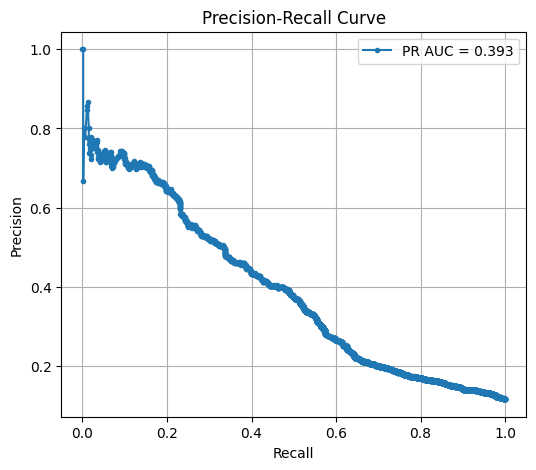


=== Evaluasi Custom Threshold (0.3) ===
              precision    recall  f1-score   support

  No Deposit       0.94      0.58      0.71      7985
     Deposit       0.19      0.74      0.30      1058

    accuracy                           0.59      9043
   macro avg       0.57      0.66      0.51      9043
weighted avg       0.86      0.59      0.67      9043

Confusion Matrix:
[[4593 3392]
 [ 273  785]]


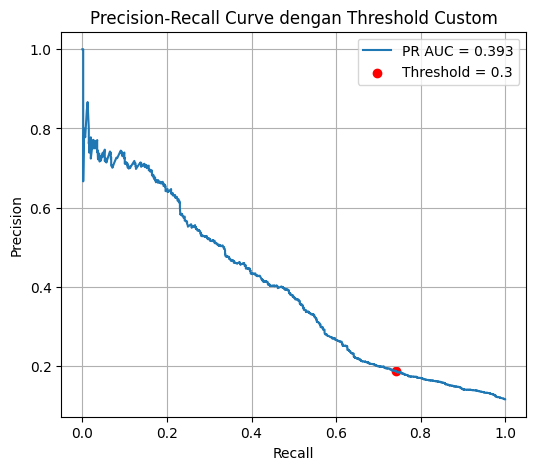

In [ ]:
# Base learners
base_learners = [
    ('cat', CatBoostClassifier(verbose=0, random_state=42, thread_count=-1)),   # kecilkan tree nanti di param_dist
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Meta learner: RandomForest
meta_model = RandomForestClassifier(n_jobs=-1, random_state=42)

# Pipeline stacking
pipe_stack_smote = ImbPipeline([
    ('preprocess', preprocessor_encode_only),
    ('smote', SMOTE(random_state=42)),
    ('model', StackingClassifier(
        estimators=base_learners,
        final_estimator=meta_model,
        passthrough=True,
        cv=3,
        n_jobs=-1
    ))
])

param_dist = {
    # CatBoost
    'model__cat__n_estimators': randint(50, 150),
    'model__cat__learning_rate': uniform(0.01, 0.05),
    'model__cat__depth': randint(3, 5),

    # LogisticRegression
    'model__lr__C': uniform(0.01, 5),

    # RandomForest meta learner
    'model__final_estimator__n_estimators': randint(20, 80),
    'model__final_estimator__max_depth': randint(3, 8),
    'model__final_estimator__min_samples_leaf': randint(1, 4),

    # Stacking stucture
    'model__passthrough': [True, False],
    'model__cv': [2, 3]
}

# RandomizedSearchCV
rand_search_stack = RandomizedSearchCV(
    estimator=pipe_stack_smote,
    param_distributions=param_dist,
    n_iter=10,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit RandomizedSearchCV
rand_search_stack.fit(X_train, y_train)

# Best params & score
print("\n=== Best Parameters ===")
print(rand_search_stack.best_params_)
print("\n=== Best Cross-Val Recall ===")
print(rand_search_stack.best_score_)

# Evaluation with PR-AUC
best_model = rand_search_stack.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\n=== Classification Report of Stacking Model===")
print(classification_report(y_test, y_pred, target_names=['No Deposit','Deposit']))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

pr_auc = average_precision_score(y_test, y_prob)
print(f"\n=== Precision-Recall AUC (PR AUC): {pr_auc:.4f}")

# Optional: plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi custom threshold (0.30)
threshold = 0.30
print(f"\n=== Evaluasi Custom Threshold ({threshold}) ===")
y_pred_thresh = (y_prob >= threshold).astype(int)
print(classification_report(y_test, y_pred_thresh, target_names=['No Deposit','Deposit']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_thresh))

# Plot Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.3f}')
plt.scatter(recall_score(y_test, y_pred_thresh),
            precision_score(y_test, y_pred_thresh),
            color='red',
            label=f'Threshold = {threshold}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve dengan Threshold Custom')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import joblib

joblib.dump(best_model, 'stacking_model.pkl')

['stacking_model.pkl']

## Feature Importance

Top 15 Feature Importance from Stacking Meta-Learner (Random Forest)


,feature,importance
0,num__age,0.220160
11,num__contact_efficiency,0.113357
1,num__balance,0.101108
36,cat__loan_yes,0.098482
35,cat__loan_no,0.071466
12,cat__job_admin.,0.052410
41,cat__month_aug,0.047881
39,cat__contact_unknown,0.037942
56,cat__age_group_Early Working Adult,0.036927
27,cat__education_primary,0.031439


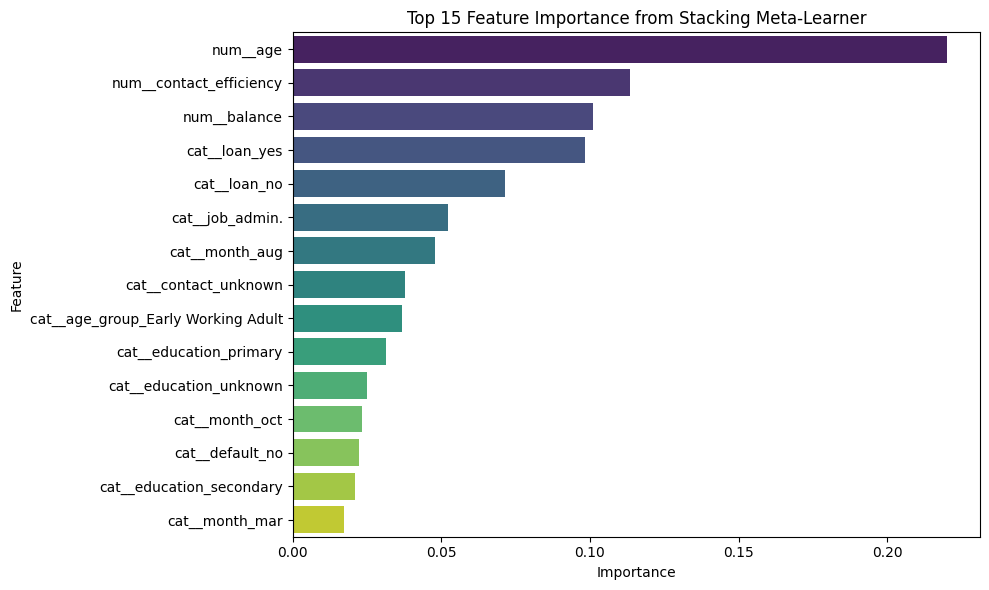

In [ ]:
# Feature Importance from the Random Forest meta-learner
# The meta-learner is the 'final_estimator' in the stacking model
meta_model = best_model.named_steps['model'].final_estimator_
feature_names_processed = best_model.named_steps['preprocess'].get_feature_names_out()

base_model_names = [name for name, estimator in best_model.named_steps['model'].estimators]
meta_feature_names = list(feature_names_processed) + [f'{name}_pred' for name in base_model_names]

meta_importance = meta_model.feature_importances_

meta_importance_df = pd.DataFrame({
    'feature': meta_feature_names,
    'importance': meta_importance
}).sort_values('importance', ascending=False)

print("Top 15 Feature Importance from Stacking Meta-Learner (Random Forest)")
display(meta_importance_df.head(15))

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=meta_importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importance from Stacking Meta-Learner')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()